binary class(1,0) classification dataset, banks dataset where customers are leaving the bank, we need to predict which customer will leave the bank in future.
### WE WILL BE BUILDING AN ARTIFICIAL NEURAL NETWORK

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
print(df.shape)

(10000, 14)


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)
#inplace = True; means the changes will be permanent

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### NOW ONE HOT ENCODING THE CATEGORICAL VALUES

In [12]:
df = pd.get_dummies(df,columns = ['Geography', 'Gender'], drop_first=True)
# drop_first=True; this will drop one out of others from geography and gender(ex- france and female)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### NOW WE WILL SCALE THE VALUE, AS SOME VALUES ARE VERY LARGE IN 'BALANCE' AND 'ESTIMATED_SALARY' THIS LEADS TO A PROBLEM WHERE WEIGHTS ARE NOT CONVERGED.

In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [16]:
X_train_trf
# this is a 2D array and iska harr array ek customer hai

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [18]:
#creating an object for the sequential model.
model = Sequential()

#adding layers (hidden, output)

model.add(Dense(3, activation='sigmoid', input_dim = 11))
# adding a dense hidden layer where our activation fuction is sigmoid, with 3 nodes and input is 11(except-exited).

model.add(Dense(1, activation='sigmoid'))
#adding a output layer.

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

#### NOW WE NEED TO COMPILE OUR MODEL, WHERE WE NEED TO SAY WHICH LOSS FUNCTION, OPTIMIZER(FOR GRADIENT DESCENT) ARE WE GOING TO USE.

In [20]:
model.compile(loss='binary_crossentropy', optimizer='Adam')
# since it is a binary classification problem, crossentropy/logloss. We can use different optimizer(gradient descent, stochastic gradient descent, root mean square propagation, etc.) but adam(adaptive moment estimation) works well.

In [21]:
history = model.fit(X_train_trf, y_train, epochs=10, validation_split = 0.2)
# fitting the model and letting it to iterate 10 times, and storing it in a dictionary named 'history'
#validation_split works on the point where we are training our model; if we have 8000 entries it will divide it and remove 2000 entries and while running this it will simultaneously check for 2000 points and tell us accuracy

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9845 - val_loss: 0.8224
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7841 - val_loss: 0.6866
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.6665 - val_loss: 0.6091
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5959 - val_loss: 0.5637
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5599 - val_loss: 0.5357
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5237 - val_loss: 0.5153
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5037 - val_loss: 0.4981
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4926 - val_loss: 0.4831
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.4734 - val_loss: 0.4713
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4590 - val_loss: 0.4619


##### we saw that loss keeps decreasing, now we have got all our weights and biases, now we will be finding where exactly are our values of weights and biases stored

In [22]:
model.layers[0].get_weights()
# we will get our weights(upar wala array) and biases(niche wala array), this is between input and hidden

[array([[ 0.15555917, -0.20412056,  0.08915533],
        [-0.53001755,  1.5398849 , -0.4031597 ],
        [ 0.18239763,  0.00672714, -0.08010484],
        [-0.42404047,  0.41384408, -0.7733868 ],
        [ 0.29416364,  0.1657042 , -0.13452937],
        [-0.2719571 ,  0.06428216,  0.519158  ],
        [ 0.2612579 , -0.5173992 ,  0.7662327 ],
        [ 0.09293082,  0.10193729, -0.46556574],
        [-0.292042  ,  0.8490843 , -0.26093966],
        [ 0.29110932, -0.00737561, -0.22520366],
        [ 0.31035268, -0.38495362,  0.8183768 ]], dtype=float32),
 array([ 0.22800726, -0.6621133 ,  0.07587199], dtype=float32)]

In [23]:
model.layers[1].get_weights()
# this is between hidden and output

[array([[-0.5358385],
        [ 0.5861277],
        [-0.5050521]], dtype=float32),
 array([-0.9766633], dtype=float32)]

In [24]:
# now comes the prediction
y_log = model.predict(X_test_trf)
# as we are using sigmoid function the output will be in the range of 0-1, a probability

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### now we need to convert this probability to 0 or 1 , for which we need to decide a threshold (ex-0.5, if probability is less than 0.5 the customer wont leave the bank and if probability is more than 0.5 then they will leave bank, threshold is generally determined with the help of a plot, but here we are guessing. 

In [25]:
y_pred = np.where(y_log>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7975

#### to increase the accuracy we can increase 
1. the number of epochs
2. activation function of hidden layer to be relu
3. by increasing the number of nodes of hidden layer 
4. or increase the number of hidden layers (but not much as it can create overfitting)

#### plotting graphs

In [27]:
import matplotlib.pyplot as plt

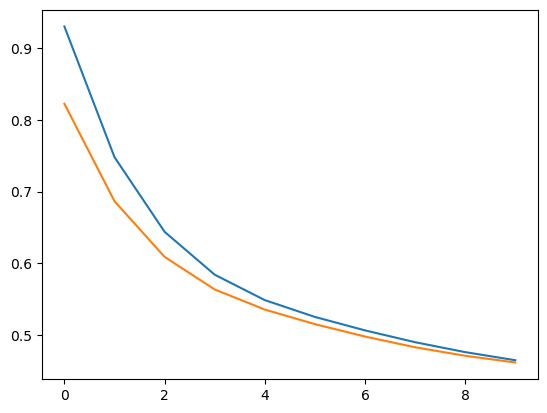

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# gap b/w them tells us about the overfitting